

### Aula 1



1 - Numa amostra de 8 funcionários de uma empresa observou-se duas variáveis: anos de trabalho e número de promoções recebidas. Calcule a correlação entre elas:

In [1]:
import pandas as pd

dados = {'promocoes' : [2,2,1,2,0,3,1,0],
         'anos_de_trabalho' : [5,6,6,7,7,8,8,8]}

df = pd.DataFrame(dados)

In [2]:
df.corr()

,promocoes,anos_de_trabalho
promocoes,1.000000,-0.194377
anos_de_trabalho,-0.194377,1.000000


2 - Uma nutricionista procurou avaliar se a massa muscular (Y) de um conjunto de pacientes diminuía com a idade (X).  Calcule o coeficiente de correlação linear dessa relação.

In [3]:
import numpy as np

massa_muscular = np.array([82,91,100,68,87,73,78,80,65,84,116,76,97,100,105,77,73,78])
idade = np.array([71,64,43,67,56,73,68,56,76,65,45,58,45,53,49,78,73,68])

In [4]:
df = pd.DataFrame({"massa_muscular":massa_muscular,"idade":idade})
df.corr()

,massa_muscular,idade
massa_muscular,1.000000,-0.836677
idade,-0.836677,1.000000


3 - Foram coletadas as informações de uma amostra de famílias para entender quantos cartões de créditos elas possuem e quais variáveis explicam isto:

In [5]:
import pandas as pd

dados = {'id_familia':[1,2,3,4,5,6,7,8],
         'n_cartoes': [4,6,6,7,8,7,8,10],
         'tamanho_familia': [2,2,4,4,5,5,6,6],
         'renda_familiar':[14,16,14,17,18,21,17,25],
         'num_automoveis': [1,2,2,1,3,2,1,2]}

df = pd.DataFrame(dados)

- Correlações:

In [6]:
df.corr()

,id_familia,n_cartoes,tamanho_familia,renda_familiar,num_automoveis
id_familia,1.000000,0.921132,0.959024,0.821064,0.164957
n_cartoes,0.921132,1.000000,0.866400,0.829031,0.341882
tamanho_familia,0.959024,0.866400,1.000000,0.672685,0.191663
renda_familiar,0.821064,0.829031,0.672685,1.000000,0.300834
num_automoveis,0.164957,0.341882,0.191663,0.300834,1.000000


* Exiba as correlações em gráficos:

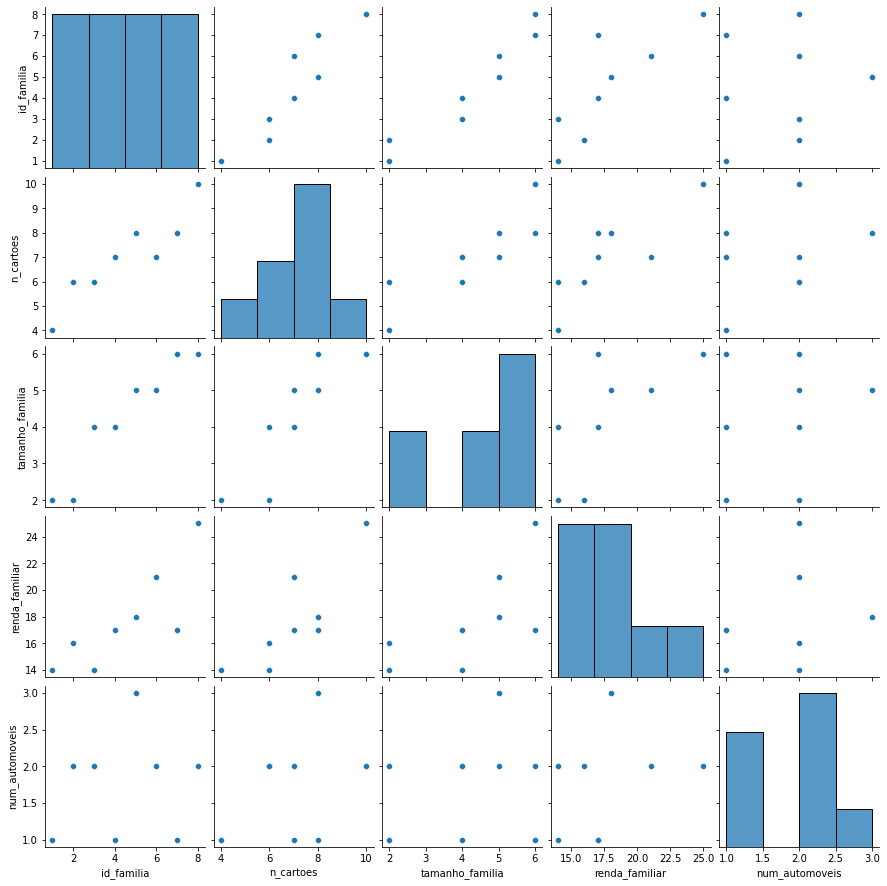

In [7]:
import seaborn as sns

sns.pairplot(df)

#Exercícios

### Exercício 01

- Crie um modelo de Regressão Linear Simples para o Exercício 3 da Aula 01.

**Dica**: para transformar uma série pandas em uma matriz coluna utilize

`x = df[['minha_coluna_pandas']]`

In [8]:
import pandas as pd

dados = {'id_familia':[1,2,3,4,5,6,7,8],
         'n_cartoes': [4,6,6,7,8,7,8,10],
         'tamanho_familia': [2,2,4,4,5,5,6,6],
         'renda_familiar':[14,16,14,17,18,21,17,25],
         'num_automoveis': [1,2,2,1,3,2,1,2]}

df = pd.DataFrame(dados)

In [10]:
#sigle linear regression
import statsmodels.api as sm

x = df['tamanho_familia'] #independent variable
y = df['n_cartoes'] #dependent variable

x = sm.add_constant(x)

#creating the model
model = sm.OLS(y,x).fit()

#predicting values
y_pred = model.predict(x)
print("predicted response:", y_pred)

#calculating residual values
res = model.resid
print("residual response:", res)
print("residual mean:", np.mean(res))

#R2, adjusted R2, b0, b1, p-value
print("R2:", model.rsquared)

print("Adjusted R2:", model.rsquared_adj)

print("b0:", model.params[0])

print("b1:", model.params[1])

print("p-value:", model.pvalues)

predicted values: [4.81428571 4.81428571 6.75714286 6.75714286 7.72857143 7.72857143
 8.7        8.7       ]
residual values: 0   -0.814286
1    1.185714
2   -0.757143
3    0.242857
4    0.271429
5   -0.728571
6   -0.700000
7    1.300000
dtype: float64
residual mean: -3.3306690738754696e-15
R2: 0.7506493506493508
Adjusted R2: 0.7090909090909092
b0: 2.8714285714285723
b1: 0.971428571428572
p-value: const              0.031508
tamanho_familia    0.005380
dtype: float64


In [ ]:
#equation
y = 2.87 + 0.97x1

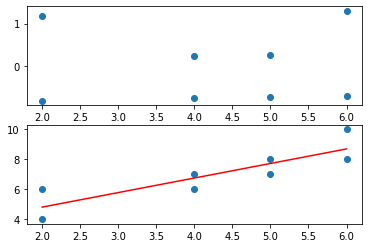

In [12]:
#plotting
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
#plotting residual value
ax[0].scatter(x.tamanho_familia, res)

#plotting linear regression
ax[1].scatter(x.tamanho_familia, y)
ax[1].plot(x.tamanho_familia, y_pred, color='r')

plt.show()

### Exercício 02

- Crie um modelo de Regressão Linear Múltipla para o Exercício 3 da Aula 01.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [14]:
import pandas as pd

dados = {'id_familia':[1,2,3,4,5,6,7,8],
         'n_cartoes': [4,6,6,7,8,7,8,10],
         'tamanho_familia': [2,2,4,4,5,5,6,6],
         'renda_familiar':[14,16,14,17,18,21,17,25],
         'num_automoveis': [1,2,2,1,3,2,1,2]}

df = pd.DataFrame(dados)

In [27]:
x = df[['tamanho_familia','renda_familiar']] #independent variable
y = df['n_cartoes'] #dependent variable
x=x.values.reshape((-1,2))

model = LinearRegression().fit(x,y)


r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)


y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.8613760556383507
intercept: 0.4816939890710348
slope: [0.63224044 0.21584699]
predicted response:
[4.76803279 5.19972678 6.03251366 6.68005464 7.52814208 8.17568306
 7.94453552 9.67131148]


Para os exercícios 03 a 10 defina:
* Quais as correlações existentes?
* (Quando Regressão Linear Múltipla) Existe colinearidade?
* Quais as variáveis dependente e independente(s) do modelo?
* Treine o modelo
* Quais os valores para B0 e para os demais coeficientes?
* Qual é a equação que descreve o comportamento dos dados?
* Quais os valores de y previsto pelo modelo?
* Quais os valores de resíduo do modelo?
* Apresente o gráfico de dispersão do resíduo.
* Quais os valores de R² e R² ajustado?
* Quais as significâncias estatísticas dos B?

### Exercício 03

Você consegue prever a nota de um estudante de acordo com a quantidade de horas que ele estudou para uma prova?

In [28]:
import pandas as pd
import numpy as np


df = pd.DataFrame({'estudante': np.arange(10),
                   'horas_estudo': [1,5,7,8,10,11,14,15,15,19],
                   'notas': [53,74,59,43,56,84,96,69,84,83]})
df.head()

,estudante,horas_estudo,notas
0,0,1,53
1,1,5,74
2,2,7,59
3,3,8,43
4,4,10,56


In [29]:
df.corr()

,estudante,horas_estudo,notas
estudante,1.000000,0.984970,0.624254
horas_estudo,0.984970,1.000000,0.627791
notas,0.624254,0.627791,1.000000


In [30]:
#sigle linear regression
import statsmodels.api as sm

x = df['horas_estudo'] #independent variable
y = df['notas'] #dependent variable

x = sm.add_constant(x)

#creating the model
model = sm.OLS(y,x).fit()

#predicting values
y_pred = model.predict(x)
print("predicted response:", y_pred)

#calculating residual values
res = model.resid
print("residual response:", res)
print("residual mean:", np.mean(res))

#R2, adjusted R2, b0, b1, p-value
print("R2:", model.rsquared)

print("Adjusted R2:", model.rsquared_adj)

print("b0:", model.params[0])

print("b1:", model.params[1])

print("p-value:", model.pvalues)

predicted response: [51.44120983 59.29754253 63.22570888 65.18979206 69.11795841 71.08204159
 76.97429112 78.93837429 78.93837429 86.79470699]
residual response: 0     1.558790
1    14.702457
2    -4.225709
3   -22.189792
4   -13.117958
5    12.917958
6    19.025709
7    -9.938374
8     5.061626
9    -3.794707
dtype: float64
residual mean: 1.2079226507921703e-14
R2: 0.39412152258869315
Adjusted R2: 0.3183867129122798
b0: 49.477126654064264
b1: 1.964083175803402
p-value: const           0.001171
horas_estudo    0.051972
dtype: float64


In [ ]:
#equation
y = 49.477 + 1.964x1

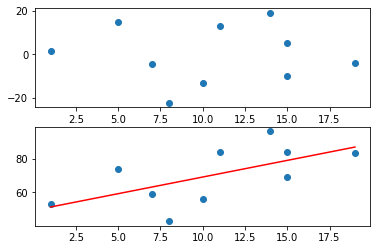

In [31]:
#plotting
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
#plotting residual value
ax[0].scatter(x.horas_estudo, res)

#plotting linear regression
ax[1].scatter(x.horas_estudo, y)
ax[1].plot(x.horas_estudo, y_pred, color='r')

plt.show()

### Exercício 04

(MATTAR,2001) Uma empresa produtora de bens de consumo de massa levantou um histórico de dez anos das vendas, em milhares de unidades, de um produto, os investimentos, em milhões de reais, em comunicação( propaganda, promoção de vendas, etc.) e o número de vendedores para o mesmo produto. Crie um modelo de regressão linear para prever as vendas da empresa. 

In [32]:
import pandas as pd

df = pd.DataFrame({'ano': [1983,1984,1985,1986,1987,1989,1990,1991,1992,1993],
                   'comunicacao': [9.5,6.5,7.0,8.0,7.5,8.5,7.5,5.5,8.0,6.0],
                   'num_vendedores': [10,8,9,12,15,11,13,7,15,10],
                   'vendas':[95,60,60,80,80,80,85,60,85,65]})
df.head()

,ano,comunicacao,num_vendedores,vendas
0,1983,9.5,10,95
1,1984,6.5,8,60
2,1985,7.0,9,60
3,1986,8.0,12,80
4,1987,7.5,15,80


In [34]:
df.corr()

#no collinearity
df.comunicacao.corr(df.num_vendedores)

0.47269251368548243

In [36]:
#multiple linear regression

x = df[["comunicacao","num_vendedores"]] #independent variable
y = df["vendas"] #dependent variable

x = sm.add_constant(x)

#creating the model
model = sm.OLS(y,x).fit()

#predicting values
y_pred = model.predict(x)
print("predicted response:", y_pred)

#calculating residual values
res = model.resid
print("residual response:", res)
print("residual mean:", np.mean(res))

#R2, adjusted R2, b0, b1, p-value
print("R2:", model.rsquared)

print("Adjusted R2:", model.rsquared_adj)

print("intercept:", model.params[0])

print("slope:", model.params[1:])

print("p-value:", model.pvalues)

predicted response: [89.58162067 63.57163829 68.91368174 81.10833823 81.80857311 83.42924251
 78.78743394 54.39812096 85.64004698 62.76130358]
residual response: 0    5.418379
1   -3.571638
2   -8.913682
3   -1.108338
4   -1.808573
5   -3.429243
6    6.212566
7    5.601879
8   -0.640047
9    2.238696
dtype: float64
residual mean: -1.1368683772161604e-14
R2: 0.8529471318363133
Adjusted R2: 0.8109320266466885
intercept: 1.6779213153259178
slope: comunicacao       7.662948
num_vendedores    1.510570
dtype: float64
p-value: const             0.890223
comunicacao       0.003178
num_vendedores    0.087033
dtype: float64


In [ ]:
#equation
y = 1.678 + 7.663x1 + 1.511x2

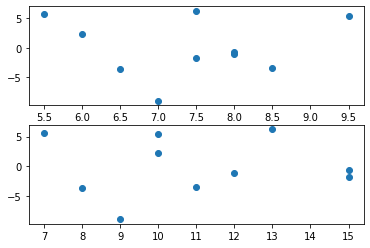

In [37]:
#plotting
fig, ax = plt.subplots(2,1)
#plotting residual value
ax[0].scatter(x.comunicacao, res)
ax[1].scatter(x.num_vendedores, res)


plt.show()

### Exercício 05 

Crie um modelo de Regressão Linear para prever o preço do índice de ações considerando as duas possíveis variáveis de entrada:

* Taxa de juro
* Taxa de desemprego

In [38]:
import pandas as pd

mercado_de_acoes = {'ano': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'mes': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'taxa_juro': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'taxa_desemprego': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'preco_indice_acoes': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = pd.DataFrame(mercado_de_acoes,columns=['ano','mes','taxa_juro','taxa_desemprego','preco_indice_acoes']) 

df.head()

,ano,mes,taxa_juro,taxa_desemprego,preco_indice_acoes
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [40]:
df.corr()
#there is collinearity
df.taxa_juro.corr(df.taxa_desemprego)

-0.925813677330288

In [42]:
#multiple linear regression

x = df[["taxa_juro","taxa_desemprego"]] #independent variable
y = df["preco_indice_acoes"] #dependent variable

x = sm.add_constant(x)

#creating the model
model = sm.OLS(y,x).fit()

#predicting values
y_pred = model.predict(x)
print("predicted response:", y_pred)

#calculating residual values
res = model.resid
print("residual response:", res)
print("residual mean:", np.mean(res))

#R2, adjusted R2, b0, b1, p-value
print("R2:", model.rsquared)

print("Adjusted R2:", model.rsquared_adj)

print("intercept:", model.params[0])

print("slope:", model.params[1:])

print("p-value:", model.pvalues)

predicted response: 0     1422.862389
1     1336.477367
2     1336.477367
3     1336.477367
4     1311.462710
5     1261.433395
6     1286.448053
7     1200.063031
8     1200.063031
9     1175.048374
10    1063.648695
11    1013.619381
12     988.604723
13     927.234359
14     952.249016
15     877.205045
16     852.190387
17     877.205045
18     877.205045
19     877.205045
20     927.234359
21     852.190387
22     852.190387
23     877.205045
dtype: float64
residual response: 0      41.137611
1      57.522633
2      20.522633
3     -43.477367
4     -55.462710
5      -7.433395
6     -52.448053
7      -5.063031
8     -41.063031
9      -8.048374
10     66.351305
11     61.380619
12     58.395277
13     37.765641
14     -9.249016
15     80.794955
16    118.809613
17     71.794955
18      6.794955
19    -11.205045
20    -51.234359
21    -30.190387
22   -148.190387
23   -158.205045
dtype: float64
residual mean: -7.958078640513122e-13
R2: 0.8976335894170215
Adjusted R2: 0.887884407456737

In [ ]:
#equation
y = 1798.40 + 345.54x1 - 250.15x2

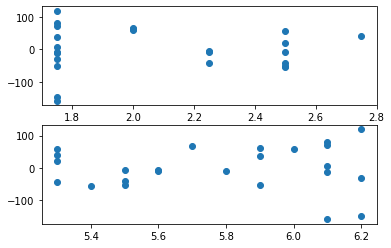

In [43]:
#plotting
fig, ax = plt.subplots(2,1)
#plotting residual value
ax[0].scatter(x.taxa_juro, res)
ax[1].scatter(x.taxa_desemprego, res)


plt.show()

### Exercício 06 

Considere um experimento em que se analisa a octanagem da gasolina em função da adição de um novo aditivo (em %). Descreva um modelo de regressão linear para descrever esse comportamento. 

In [44]:
import pandas as pd

df = pd.DataFrame({'octanagem':[80.5,81.6,82.1,83.7,83.9,85],
                   'aditivo':[1,2,3,4,5,6]})
df.head()

,octanagem,aditivo
0,80.5,1
1,81.6,2
2,82.1,3
3,83.7,4
4,83.9,5


In [45]:
df.corr()

,octanagem,aditivo
octanagem,1.000000,0.987441
aditivo,0.987441,1.000000


In [46]:
#simple linear regression

x = df[["octanagem"]] #independent variable
y = df["aditivo"] #dependent variable

x = sm.add_constant(x)

#creating the model
model = sm.OLS(y,x).fit()

#predicting values
y_pred = model.predict(x)
print("predicted response:", y_pred)

#calculating residual values
res = model.resid
print("residual response:", res)
print("residual mean:", np.mean(res))

#R2, adjusted R2, b0, b1, p-value
print("R2:", model.rsquared)

print("Adjusted R2:", model.rsquared_adj)

print("intercept:", model.params[0])

print("slope:", model.params[1:])

print("p-value:", model.pvalues)

predicted response: 0    0.968040
1    2.178977
2    2.729403
3    4.490767
4    4.710937
5    5.921875
dtype: float64
residual response: 0    0.031960
1   -0.178977
2    0.270597
3   -0.490767
4    0.289063
5    0.078125
dtype: float64
residual mean: 2.5294581244376484e-14
R2: 0.9750405844155844
Adjusted R2: 0.9688007305194805
intercept: -87.65056818181894
slope: octanagem    1.100852
dtype: float64
p-value: const        0.000275
octanagem    0.000236
dtype: float64


In [ ]:
#equation
y = -87.65 + 1.1x1

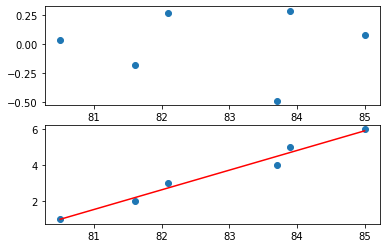

In [47]:
#plotting
fig, ax = plt.subplots(2,1)
#plotting residual value
ax[0].scatter(x.octanagem, res)

#plotting linear regression
ax[1].scatter(x.octanagem, y)
ax[1].plot(x.octanagem, y_pred, color='r')

plt.show()

### Exercício 07

Foram coletadas as informações de consumo de água e de temperatura em uma determinada empresa. Crie um modelo capaz de relacionar as variáveis.

In [48]:
import pandas as pd

df = pd.DataFrame({'temperatura':[77,86,71,75,85,83,72,79,89,80,84,76],
                   'consumo':[89,171,58,76,139,130,78,115,182,130,154,105]})
df.head()

,temperatura,consumo
0,77,89
1,86,171
2,71,58
3,75,76
4,85,139


In [49]:
df.corr()

,temperatura,consumo
temperatura,1.000000,0.967373
consumo,0.967373,1.000000


In [50]:
#simple linear regression

x = df[["temperatura"]] #independent variable
y = df["consumo"] #dependent variable

x = sm.add_constant(x)

#creating the model
model = sm.OLS(y,x).fit()

#predicting values
y_pred = model.predict(x)
print("predicted response:", y_pred)

#calculating residual values
res = model.resid
print("residual response:", res)
print("residual mean:", np.mean(res))

#R2, adjusted R2, b0, b1, p-value
print("R2:", model.rsquared)

print("Adjusted R2:", model.rsquared_adj)

print("intercept:", model.params[0])

print("slope:", model.params[1:])

print("p-value:", model.pvalues)

predicted response: 0     100.744651
1     160.216701
2      61.096618
3      87.528640
4     153.608696
5     140.392685
6      67.704624
7     113.960663
8     180.040718
9     120.568668
10    147.000690
11     94.136646
dtype: float64
residual response: 0    -11.744651
1     10.783299
2     -3.096618
3    -11.528640
4    -14.608696
5    -10.392685
6     10.295376
7      1.039337
8      1.959282
9      9.431332
10     6.999310
11    10.863354
dtype: float64
residual mean: 5.565918096787451e-14
R2: 0.9358096905964577
Adjusted R2: 0.9293906596561035
intercept: -408.07177363699134
slope: temperatura    6.608006
dtype: float64
p-value: const          2.997284e-06
temperatura    2.756770e-07
dtype: float64


In [ ]:
#equation 
y = -408.072 + 6.608x1

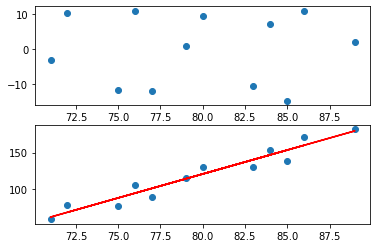

In [55]:
#plotting
fig, ax = plt.subplots(2,1)
#plotting residual value
ax[0].scatter(x.temperatura, res)

#plotting linear regression
ax[1].scatter(x.temperatura, y)
ax[1].plot(x.temperatura, y_pred, color='r')

plt.show()

### Exercício 08

Um banco pretende estudar a relação entre o volume de vendas de seguros efetuadas durante um dado período de tempo por seus vendedores, considerando seus anos de experiência e seu score num teste de inteligência. 

In [56]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/brunamulinari/DataBasesPython/master/Exercicios/Exercicio%2010%20-%20RegMult.csv', delimiter=';',decimal=',')
df.head()

,Vendedor,Vendas,Anos de experiencia,Score no Teste,interacao
0,1,50,10,3,30
1,2,48,10,3,30
2,3,50,10,3,30
3,4,49,10,3,30
4,5,50,10,3,30


In [58]:
df.corr()
#no collinearity
df["Anos de experiencia "].corr(df["Score no Teste"])

0.13529707204813154

In [59]:
#multiple linear regression

x = df[["Anos de experiencia ","Score no Teste"]] #independent variable
y = df[" Vendas "] #dependent variable

x = sm.add_constant(x)

#creating the model
model = sm.OLS(y,x).fit()

#predicting values
y_pred = model.predict(x)
print("predicted response:", y_pred)

#calculating residual values
res = model.resid
print("residual response:", res)
print("residual mean:", np.mean(res))

#R2, adjusted R2, b0, b1, p-value
print("R2:", model.rsquared)

print("Adjusted R2:", model.rsquared_adj)

print("intercept:", model.params[0])

print("slope:", model.params[1:])

print("p-value:", model.pvalues)

predicted response: 0     44.989788
1     44.989788
2     44.989788
3     44.989788
4     44.989788
5     37.639858
6     37.639858
7     37.639858
8     37.639858
9     37.639858
10    31.507580
11    31.507580
12    31.507580
13    21.217677
14    21.217677
15    21.217677
16    24.157650
17    24.157650
18    37.639858
19    37.639858
20    18.025372
21    18.025372
22    10.675441
23    10.675441
24    10.675441
25    21.217677
26    21.217677
27    21.217677
28    10.675441
29    10.675441
dtype: float64
residual response: 0      5.010212
1      3.010212
2      5.010212
3      4.010212
4      5.010212
5      2.360142
6      1.360142
7      1.360142
8      0.360142
9      3.360142
10    -1.507580
11    -3.507580
12    -4.507580
13     3.782323
14     4.782323
15     0.782323
16    -0.157650
17    -3.157650
18    -7.639858
19   -13.639858
20    -8.025372
21    -7.025372
22     4.324559
23     5.324559
24     6.324559
25    -5.217677
26    -3.217677
27    -7.217677
28     2.324559
29

In [ ]:
#equation
y = -10.157 + 1.47x1 + 13.48x2

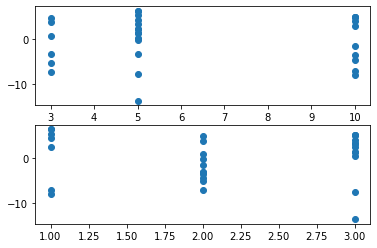

In [60]:
#plotting
fig, ax = plt.subplots(2,1)
#plotting residual value
ax[0].scatter(x["Anos de experiencia "], res)
ax[1].scatter(x["Score no Teste"], res)


plt.show()

### Exercício 09

Uma empresa pretende analisar os gastos de manutenção com sua frota de veículos de um  mesmo modelo considerando  a quilometragem inicial  do veículo e a diferença  dessa quilometragem desde a aquisição do automóvel.

In [18]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/brunamulinari/DataBasesPython/master/Exercicios/Exercicio%209%20-%20RegMult.csv', delimiter=';',decimal=',')
df.head()

,KM_Inicial,Km_Diferenca,Total,interacao
0,0,20695,770.727774,0
1,0,29413,1467.109762,0
2,0,16159,876.164237,0
3,0,22778,1369.385191,0
4,0,11829,582.068977,0


In [3]:
df.corr()

#no collinearity
df["KM_Inicial"].corr(df["Km_Diferenca"])

-0.12378246176408912

In [41]:
#multiple linear regression
import statsmodels.formula.api as sm
import numpy as np
x = df[["KM_Inicial","Km_Diferenca"]] #independent variable
y = df["Total"] #dependent variable

#x = sm.add_constant(x.values.reshape((-1, 1)))

#creating the model
model = sm.ols(formula='Total ~ KM_Inicial + Km_Diferenca', data=df)
results_formula = model.fit()

# #predicting values
# y_pred = model.predict(x)
# print("predicted response:", y_pred)

# #calculating residual values
# res = model.resid
# print("residual response:", res)
# print("residual mean:", np.mean(res))

# #R2, adjusted R2, b0, b1, p-value
# print("R2:", model.rsquared)

# print("Adjusted R2:", model.rsquared_adj)

# print("intercept:", model.params[0])

# print("slope:", model.params[1:])

# print("p-value:", model.pvalues)

In [ ]:
#equation
y = -109.25 + 0.036x1 + 0.056x2

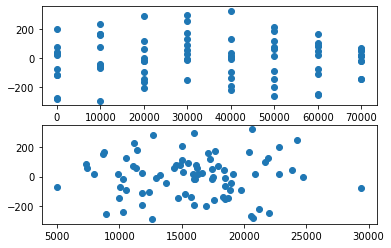

In [9]:
#plotting
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
#plotting residual value
ax[0].scatter(x["KM_Inicial"], res)
ax[1].scatter(x["Km_Diferenca"], res)


plt.show()

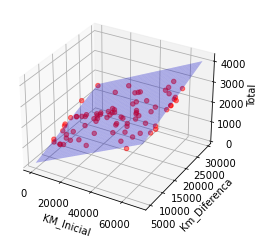

In [43]:
import matplotlib.pyplot as plt
import numpy as np

x_surf, y_surf = np.meshgrid(np.linspace(x.KM_Inicial.min(), x.KM_Inicial.max(), 100),np.linspace(x.Km_Diferenca.min(), x.Km_Diferenca.max(), 100))
onlyX = pd.DataFrame({'KM_Inicial': x_surf.ravel(), 'Km_Diferenca': y_surf.ravel()})

fittedY= results_formula.predict(onlyX)

fittedY=np.array(fittedY)




# Visualize the Data for Multiple Linear Regression

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x['KM_Inicial'],x['Km_Diferenca'],y,c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('KM_Inicial')
ax.set_ylabel('Km_Diferenca')
ax.set_zlabel('Total')
plt.show()

### Exercício 10

Uma empresa pretende analisar o tempo médio do processo  de atendimento observando  o turno de entrada dos funcionários e o tempo de experiência deles. Os turnos de trabalho analisados foram  manhã e tarde e o tempo de experiência é dado em dias.

In [67]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/brunamulinari/DataBasesPython/master/Exercicios/Exercicio%208%20-%20RegMult.csv', delimiter=';',decimal=',')
df.head()

,TMP,Experiencia,Turno
0,180.330,99,T
1,143.629,99,M
2,164.092,99,M
3,174.523,64,T
4,137.104,298,M


* Necessário fazer dummy com a variável turno de trabalho:

In [68]:
turno_manha = {'M':1, 'T':0}

df['turno_manha'] = df['Turno'].map(turno_manha) 

In [69]:
turno_tarde = {'M':0, 'T':1}

df['turno_tarde'] = df['Turno'].map(turno_tarde) 

In [70]:
df.head()

,TMP,Experiencia,Turno,turno_manha,turno_tarde
0,180.330,99,T,0,1
1,143.629,99,M,1,0
2,164.092,99,M,1,0
3,174.523,64,T,0,1
4,137.104,298,M,1,0


In [71]:
df.corr()

,TMP,Experiencia,turno_manha,turno_tarde
TMP,1.000000,-0.199404,-0.222481,0.222481
Experiencia,-0.199404,1.000000,0.342667,-0.342667
turno_manha,-0.222481,0.342667,1.000000,-1.000000
turno_tarde,0.222481,-0.342667,-1.000000,1.000000


In [72]:
#multiple linear regression

x = df[["Experiencia","turno_manha","turno_tarde"]] #independent variable
y = df["TMP"] #dependent variable

x = sm.add_constant(x)

#creating the model
model = sm.OLS(y,x).fit()

#predicting values
y_pred = model.predict(x)
print("predicted response:", y_pred)

#calculating residual values
res = model.resid
print("residual response:", res)
print("residual mean:", np.mean(res))

#R2, adjusted R2, b0, b1, p-value
print("R2:", model.rsquared)

print("Adjusted R2:", model.rsquared_adj)

print("intercept:", model.params[0])

print("slope:", model.params[1:])

print("p-value:", model.pvalues)

predicted response: 0      184.269241
1      173.164560
2      173.164560
3      186.463562
4      160.688279
          ...    
199    180.695633
200    184.269241
201    163.823023
202    166.644293
203    184.269241
Length: 204, dtype: float64
residual response: 0      -3.939241
1     -29.535560
2      -9.072560
3     -11.940562
4     -23.584279
         ...    
199    34.776367
200    -5.263241
201     2.649977
202    31.662707
203    62.565759
Length: 204, dtype: float64
residual mean: -3.413391573749501e-14
R2: 0.0666862396745106
Adjusted R2: 0.05739953559166999
intercept: 123.282462146017
slope: Experiencia    -0.062695
turno_manha    56.088891
turno_tarde    67.193572
dtype: float64
p-value: const          9.057337e-90
Experiencia    5.576831e-02
turno_manha    2.657221e-43
turno_tarde    1.070879e-66
dtype: float64


In [ ]:
#equation
y = 123.28 - 0.063x1 + 56.089x2 + 67.196x3

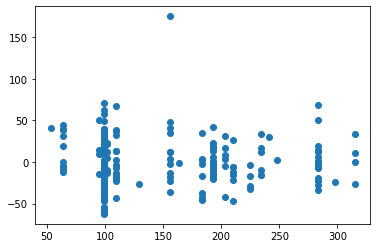

In [73]:
#plotting residual value
plt.scatter(x["Experiencia"], res)

plt.show()

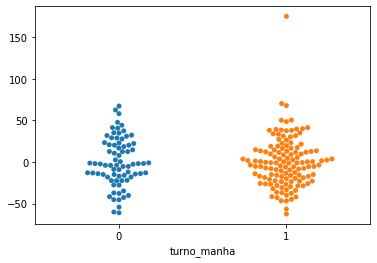

In [76]:
sns.swarmplot(x=x["turno_manha"],y=res, data=df)
plt.show()

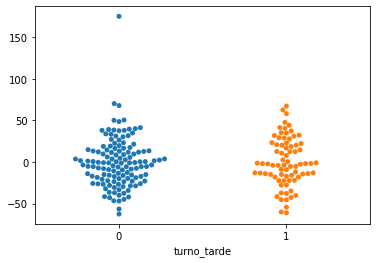

In [77]:
sns.swarmplot(x=x["turno_tarde"],y=res, data=df)
plt.show()

## Extra

Material sobre regressão linear do [MIT](http://www.mit.edu/~6.s085/notes/lecture3.pdf).

Outras métricas que podemos utilizar para avaliarmos nossos modelos ([Texto](https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96)).